# 텍스트 빈도수 시각화 : 단어 빈도 그래프, 워드클라우드
1. 데이터 수집(로딩)
1. 텍스트 전처리
1. 빈도수 계산
1. 단어 빈도 그래프 시각화
1. 워드클라우드 시각화

## 1. 데이터 수집(로딩)

In [1]:
# 실습 문서 : 대한민국 헌법
from konlpy.corpus import kolaw
input_filename = 'constitution.txt'
const_doc = kolaw.open(input_filename).read()

#가져온 데이터 확인 (타입, 길이, 일부 데이터)

#print(type(const_doc))  # 데이터 타입 확인 (str)
#print(len(const_doc))   # 텍스트 길이 확인
#print(const_doc[:300])  # 처음 300자 출력

print(type(const_doc),len(const_doc))
print(const_doc[:300])

<class 'str'> 18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을


## 2. 텍스트 전처리
* 한글 : 품사 태깅 -> 필요 품사 단어만 사용 -> 불용어 삭제

In [5]:
# 명사만 추출
from konlpy.tag import Okt
t = Okt()
const_nouns = t.nouns(const_doc)

print(len(const_nouns))
print(const_nouns[:30])

3882
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애']


In [7]:
# 명사(일반 명사, 고유 명사), 동사, 형용사 단어 추출
my_tags=['Noun','Verb','Adjective']
const_pos = t.pos(const_doc)
print(const_pos[:50])
const_pos_new =[token for token, tag in const_pos if tag in my_tags]
print(const_pos[:20])

[('대한민국', 'Noun'), ('헌법', 'Noun'), ('\n\n', 'Foreign'), ('유구', 'Noun'), ('한', 'Josa'), ('역사', 'Noun'), ('와', 'Josa'), ('전통', 'Noun'), ('에', 'Josa'), ('빛나는', 'Verb'), ('우리', 'Noun'), ('대', 'Modifier'), ('한', 'Modifier'), ('국민', 'Noun'), ('은', 'Josa'), ('3', 'Number'), ('·', 'Punctuation'), ('1', 'Number'), ('운동', 'Noun'), ('으로', 'Josa'), ('건립', 'Noun'), ('된', 'Verb'), ('대한민국', 'Noun'), ('임시정부', 'Noun'), ('의', 'Josa'), ('법', 'Noun'), ('통과', 'Noun'), ('불의', 'Noun'), ('에', 'Josa'), ('항거', 'Noun'), ('한', 'Josa'), ('4', 'Number'), ('·', 'Punctuation'), ('19', 'Number'), ('민주', 'Noun'), ('이념', 'Noun'), ('을', 'Josa'), ('계승', 'Noun'), ('하고', 'Josa'), (',', 'Punctuation'), ('조국', 'Noun'), ('의', 'Josa'), ('민주', 'Noun'), ('개혁', 'Noun'), ('과', 'Josa'), ('평화', 'Noun'), ('적', 'Suffix'), ('통일', 'Noun'), ('의', 'Josa'), ('사명', 'Noun')]
[('대한민국', 'Noun'), ('헌법', 'Noun'), ('\n\n', 'Foreign'), ('유구', 'Noun'), ('한', 'Josa'), ('역사', 'Noun'), ('와', 'Josa'), ('전통', 'Noun'), ('에', 'Josa'), ('빛나는', 'Verb'), ('우리

In [9]:
# 불용어 삭제 : 의미없는데 고빈도로 나오는 단어 추가
my_stopwords=['하며', '입','하고','로써','하여','애','제','그', '이','하','있','받']

result_token = [token for token in const_pos_new if token not in my_stopwords and len(token) >1]
# 토큰 수
print(len(result_token))
# 토큰 일부 확인
print(result_token[:50])


3919
['대한민국', '헌법', '유구', '역사', '전통', '빛나는', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '확고히', '정치', '경제', '사회', '문화', '모든', '영역', '있어서']


## 3.  빈도수 계산

In [11]:
# Counter 객체 생성
from collections import Counter
counter =Counter(result_token)
# 단어 수
print(len(counter))
# Counter 객체 내 (단어, 빈도수) 확인
print(list(counter.items())[:50])
# count가 있으면 슬라이싱이 안됨 
# counter -> dictionary로 만듦 

1002
[('대한민국', 11), ('헌법', 53), ('유구', 1), ('역사', 1), ('전통', 1), ('빛나는', 1), ('우리', 3), ('국민', 61), ('운동', 2), ('건립', 1), ('임시정부', 1), ('통과', 1), ('불의', 2), ('항거', 1), ('민주', 6), ('이념', 1), ('계승', 2), ('조국', 3), ('개혁', 1), ('평화', 6), ('통일', 6), ('사명', 2), ('각하', 1), ('정의', 1), ('인도', 1), ('동포', 1), ('민족', 3), ('단결', 1), ('공고', 3), ('모든', 37), ('사회', 8), ('폐습', 1), ('타파', 1), ('자율', 2), ('조화', 2), ('바탕', 1), ('자유민주', 2), ('질서', 8), ('더욱', 1), ('확고히', 1), ('정치', 9), ('경제', 18), ('문화', 4), ('영역', 4), ('있어서', 9), ('각인', 1), ('기회', 3), ('균등히', 1), ('능력', 3), ('최고', 2)]


In [13]:
# 빈도수 상위 단어의 (단어, 빈도수) 튜플 리스트 추출
counter.most_common(20)
#앞에 단어와 빈도수를 나눔

[('한다', 155),
 ('법률', 127),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('의하여', 66),
 ('하는', 64),
 ('국민', 61),
 ('있다', 57),
 ('헌법', 53),
 ('모든', 37),
 ('하여야', 31),
 ('아니', 30),
 ('기타', 26),
 ('가진다', 25),
 ('사항', 23),
 ('권리', 21),
 ('된다', 21),
 ('필요한', 21),
 ('없다', 21)]

## 4. 단어 빈도 그래프 시각화
1. 데이터 준비
2. 그래프 정보 추가
3. 막대 그래프 생성
4. 그래프 출력 (화면, 파일)

In [15]:
# 데이터 준비 : 빈도수 상위 20개의 단어만 추출
# x 데이터 : word, y 데이터 : count
most_common = counter.most_common(20)

#관심없는것은 _로 대체 
word_list=[word for word, _ in counter.most_common(20)]
count_list=[count for _, count in counter.most_common(20)]
print(word_list)
print(count_list)

['한다', '법률', '대통령', '국가', '국회', '의하여', '하는', '국민', '있다', '헌법', '모든', '하여야', '아니', '기타', '가진다', '사항', '권리', '된다', '필요한', '없다']
[155, 127, 83, 73, 68, 66, 64, 61, 57, 53, 37, 31, 30, 26, 25, 23, 21, 21, 21, 21]


In [17]:
# matplotlib 한글 폰트 설정
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

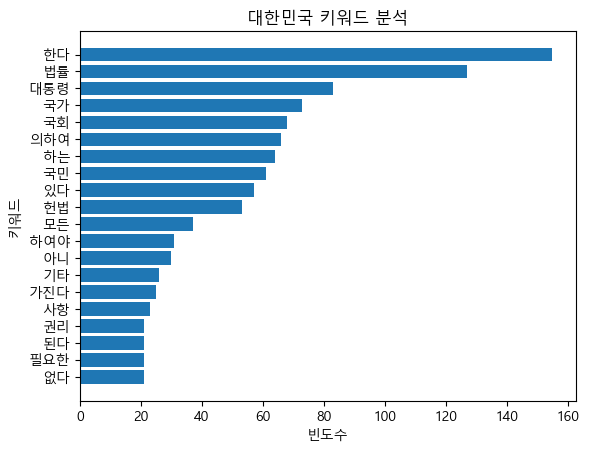

In [19]:
import matplotlib.pyplot as plt

# 수평 막대그래프
plt.barh(word_list[::-1],count_list[::-1])
# 그래프 정보 추가 
plt.title("대한민국 키워드 분석")
plt.xlabel("빈도수")
plt.ylabel("키워드")
# 화면에 출력
plt.show()

ValueError: Format 'csv' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

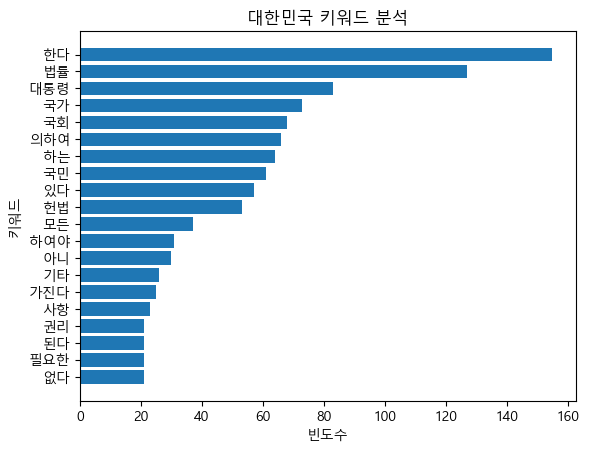

In [61]:
# 그래프 저장 : 그래프 생성 후 바로 savefig 사용
plt.barh(word_list[::-1],count_list[::-1])
#plt.barh(word_list,count_list, ascending=False)-> barh는 ascending이 안됨 
# 그래프 정보 추가 
plt.title("대한민국 키워드 분석")
plt.xlabel("빈도수")
plt.ylabel("키워드")
output_filename = "./result"+input_filename.replace(".txt", "_graph.jpg")
plt.savefig(output_filename)

### 03-5. 워드 클라우드 시각화

* conda 환경에서 wordcloud 설치 (conda install wordcloud)

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 폰트 path 지정
font_path = "c:/Windows/fonts/malgun.ttf"

# WordCloud 객체 생성
wordcloud = WordCloud(font_path,
                       width=600,
                       height=600,
                       max_words=50,
                       background_color='ivory')

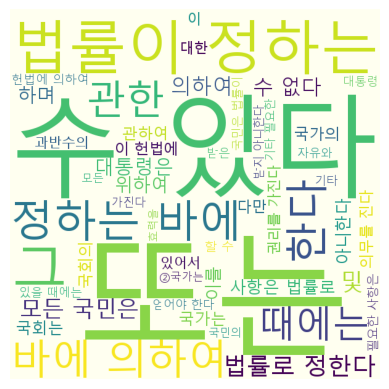

In [43]:
# 전체 텍스트로 워드클라우드 시각화
wordcloud = wordcloud.generate(const_doc)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

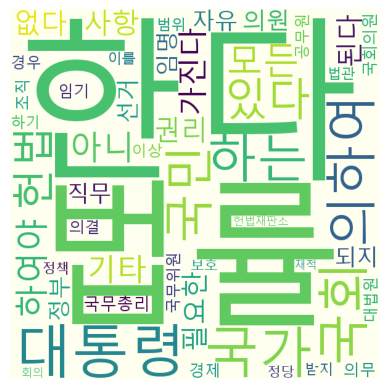

In [41]:
# 빈도 데이터로 워드클라우드 시각화
worldcloud =wordcloud.generate_from_frequencies(counter)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [49]:
import os
print(os.getcwd())

# wordcloud 이미지 저장
#output_filename ="./result/"+input_filename.replace(".txt","_wordcloud.jpg")
#wordcloud.to_file(output_filename)
# wordcloud 이미지 저장
output_filename = "../result/" + input_filename.replace(".txt", "_wordcloud.jpg")
wordcloud.to_file(output_filename)

D:\_DeepNLP25\data


다음 영화 리뷰 키워드 시각화
1.텍스트 로딩
2.토큰화
3.빈도수 추출
4.수평막대 그래프
5.워드클라우드 

In [51]:
import pandas as pd 
input_filename="daum_movie_review.csv"
data_df= pd.read_csv("../data/"+input_filename)
data_df.head()

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


In [53]:
review_list =list(data_df.review)
review_list[:10]

['돈 들인건 티가 나지만 보는 내내 하품만',
 '몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.',
 '이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 모은 것까지는 좋았으나 이걸 모두 한 그릇에 섞어버린 듯한 느낌... 그래도 다음 작품을 기대하게 만든다...',
 '이 정도면 볼만하다고 할 수 있음!',
 '재미있다',
 '나는 재밌게 봄',
 '0.5점은 줄 수 없냐?',
 '헐..다 죽었어....나중에 앤트맨 보다가도 깜놀...',
 '충격 결말',
 '응집력']